## Exemplo de Análise descritiva

Nesse notebook criamos uma análise descritiva em cima de um dataframe que contem diversos dados sobre  maquinário de construção civil.

Focamos em variáveis de interesse que são tempratura do ar em Kelvin, temperatura do processo em kelvin,  a velocidade de rotação das máquinas rotações por minuto, e o torque entregue em Nm

analisamos frequência e correlação entre essas variáveis.

## Importando Bibliotecas necessárias



1.   pandas é uma biblioteca para análise de dados
2.   numpy é uma biblioteca robusta para analisar grandes matrizes e possui diversas funções estatisticas descritivas
3.   matplotlib é uma biblioteca python bem robusta para criar visualizações
4.   seaborn é uma biblioteca baseada no matplotlib focada em vizualizações específicas estatísticas.
5.   Scipy.stats é um modulo da biblioteca scipy, focada em funções de probabilidade,



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## importando dataframe

a url abaixo é o link para o dataframe utilizado.


O método pandas.read_csv lê arquivos do tipo csv para ser utilzado como dataframe.

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
df = pd.read_csv(url)

## criando vizualização inicial do dataframe

Usamos o método do pandas de vizualização so do cabeçário , o Dataframe.head() e as primeiras 5 linhas. 

In [4]:

pd.DataFrame.head(df)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


##selecionando colunas específicas para análise

Nem sempre queremos analisar todo o dataframe, mas apenas algumas dessas características. o codigo abaixo mostra como selecionar apenas as caracteristícas que queremos análisar.

In [21]:
numClean = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']]
pd.DataFrame.head(numClean)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
0,298.1,308.6,1551,42.8
1,298.2,308.7,1408,46.3
2,298.1,308.5,1498,49.4
3,298.2,308.6,1433,39.5
4,298.2,308.7,1408,40.0


##Criando visualização de histogramas

Aqui criei exemplo como fazer separadamente, e como criar em um for loop

a primeira célula dessa parte, criei uma lista apenas com o nome das labels do dataframe pra simplificar o código na hora de criar o loop for. Temos duas formas de fazer, uma mais laborosa e outra usando o loop for que simplifica a criação da visualização.

abaixo vamos ter os histogramas das variáveis que selecionamos acima.

In [22]:
names = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']
nitens = [0, 1, 2, 3]


Text(0.5, 0, 'Torque [Nm]')

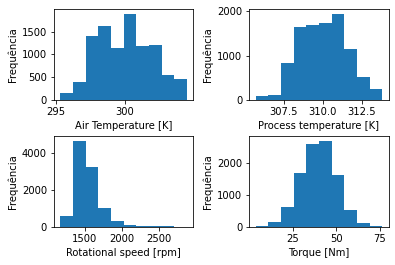

In [15]:
##fazendo manual 

fig = plt.figure()
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.hist(numClean[f"{names[0]}"])
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Air Temperature [K]')
  
ax2.hist(numClean[f"{names[1]}"])
ax2.set_ylabel('Frequência')
ax2.set_xlabel("Process temperature [K]")

ax3.hist(numClean[f"{names[2]}"])
ax3.set_ylabel('Frequência')
ax3.set_xlabel('Rotational speed [rpm]')

ax4.hist(numClean[f"{names[3]}"])
ax4.set_ylabel('Frequência')
ax4.set_xlabel('Torque [Nm]')  




In [8]:
names[0]

'Air temperature [K]'

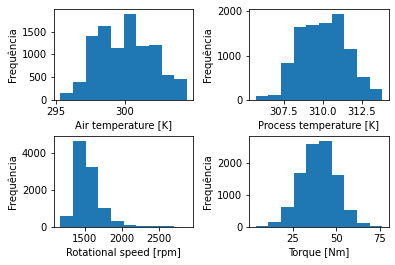

In [23]:
#fazendo em loop for
fig = plt.figure()
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for n, name in zip(nitens,names):
  ax = fig.add_subplot(2,2,n+1)
  ax.hist(numClean[f"{name}"])
  ax.set_ylabel('Frequência')
  ax.set_xlabel(f"{name}")
  

  

##Criando descrição dos principais valores descritivos.

usando o método pandas describe(), conseguimos obter os principais parametros descritivos desse conjunto de dados, como média, desvio padrão, minimo, máximo e percentis(25%, mediana e 75%) 

In [10]:
desc = numClean.describe()
desc

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910
std,2.000259,1.483734,179.284096,9.968934
min,295.300000,305.700000,1168.000000,3.800000
25%,298.300000,308.800000,1423.000000,33.200000
50%,300.100000,310.100000,1503.000000,40.100000
75%,301.500000,311.100000,1612.000000,46.800000
max,304.500000,313.800000,2886.000000,76.600000


##Criando Vizualização das correlações

Podemos analisar correlações entre os valores selecionados utilizando o método pandas corr() que vai criar uma matriz de correlação.

Para a vizualização mais rápida dessa matriz de correlação, podemos utilizar a biblioteca seaborn e seu método pairplot().

Abaixo vamos ter a matriz de correlação seguida da vizualização da correlação das variáveis.

obs: onde é analisada a correlação da variável com ela mesma, onde a correlação seria absoluta no valor de 1, o gráfico do pairplot gera a vizualização do histograma.

In [25]:
corrMat = numClean.corr()
corrMat 

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
Air temperature [K],1.000000,0.876107,0.022670,-0.013778
Process temperature [K],0.876107,1.000000,0.019277,-0.014061
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000


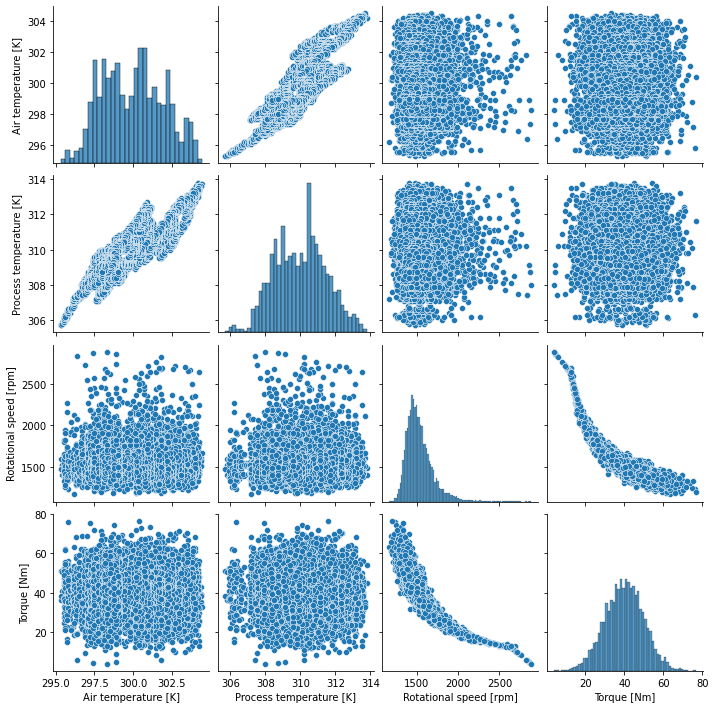

In [11]:
corre = sns.pairplot(numClean)
corre